# Problem Statement /Assignment Part-I
#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know the following things about the prospective properties:

#### Which variables are significant in predicting the price of a house, and

#### How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

# Business Goal
####  You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market


# Program Structure 

#### 1 Data exploration and understanding
#### 2 Data cleaning
#### 3 Data preparation
#### 4 Split the data into train and test set
#### 5 Ridge regression
#### 6  Lasso regression
#### 7 Conclusion


## 1 Data exploration and understanding

##### As First step import the necessary libraries required for predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv(r'E:\RAju\MS in AI\After May 2022\Advanced Regression Assignment\train.csv',encoding = 'latin')

### Reading the data for overall idea

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing['MSSubClass'] = housing['MSSubClass'].astype(object)


## Analysis of Numerical data



In [7]:
num_housing = housing.select_dtypes(include=['int64', 'float64'])

In [8]:
a = num_housing.isnull().sum()*100/len(num_housing) # calculate percent of missing data in each column
print(a[a>0])

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64


In [9]:
## 'LotFrontage' column has significant (appx 18%) of missing data, we will impute it later
## 'GarageYrBlt' has about 6% NA values. we will drop it if we find any highly correlated column on further analysis.


In [10]:
## We can drop ID column which does is not a predictor variable

housing.drop(['Id'], axis=1, inplace=True)
num_housing.drop(['Id'], axis=1, inplace=True)

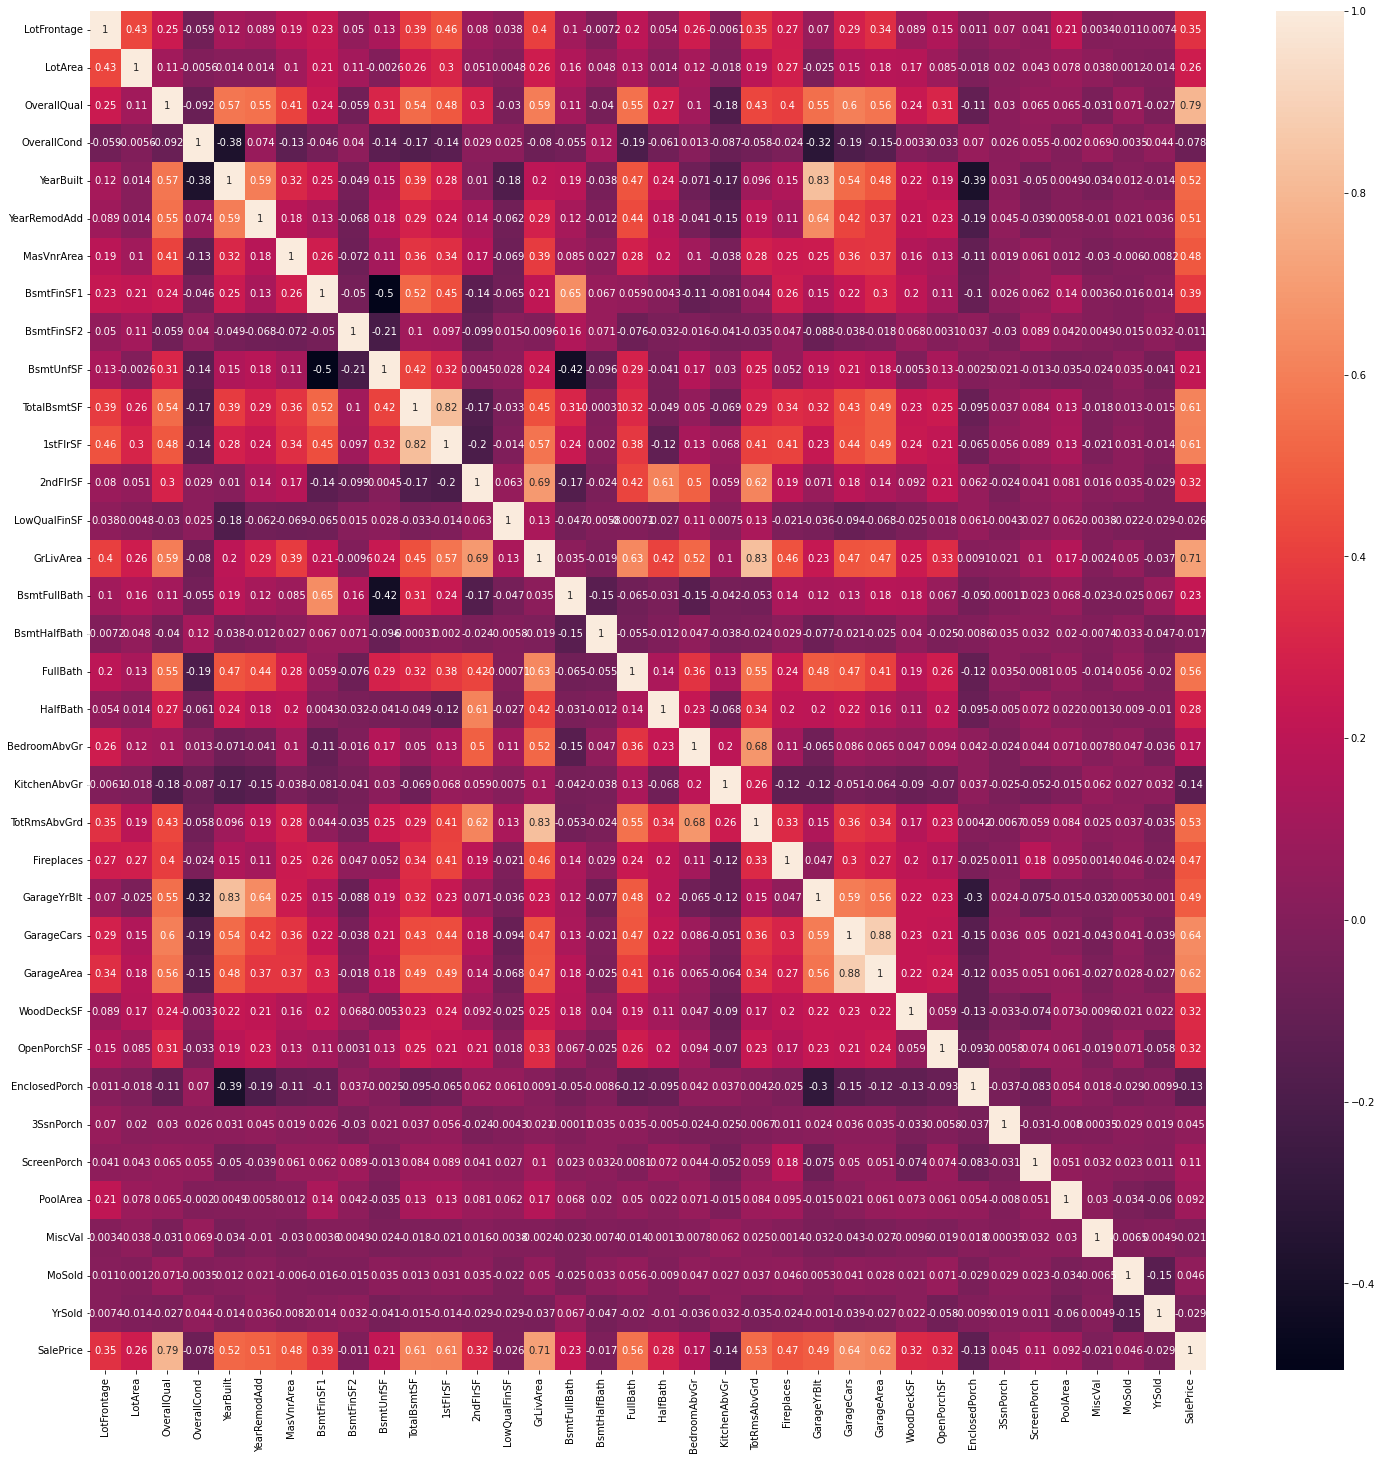

In [11]:
plt.figure(figsize=(25,25))
sns.heatmap(housing.corr(),annot = True)
plt.show()

## columns with high correlation-
#### GarageCars and GarageArea (0.88) GarageYrBlt and YearBuilt (0.83) TotRmsAbvGrd and GrLivArea (0.83) TotalBsmtSF and 1stflrSF (0.82) We can drop one of the highly correlated columns

In [12]:
housing.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

In [13]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt
housing['HouseAge'] = housing.YrSold - housing.YearBuilt

In [14]:
#Drop YrSold, YearBuilt after HouseAge
housing=housing.drop(columns=['YrSold', 'YearBuilt','MoSold'], axis=1)

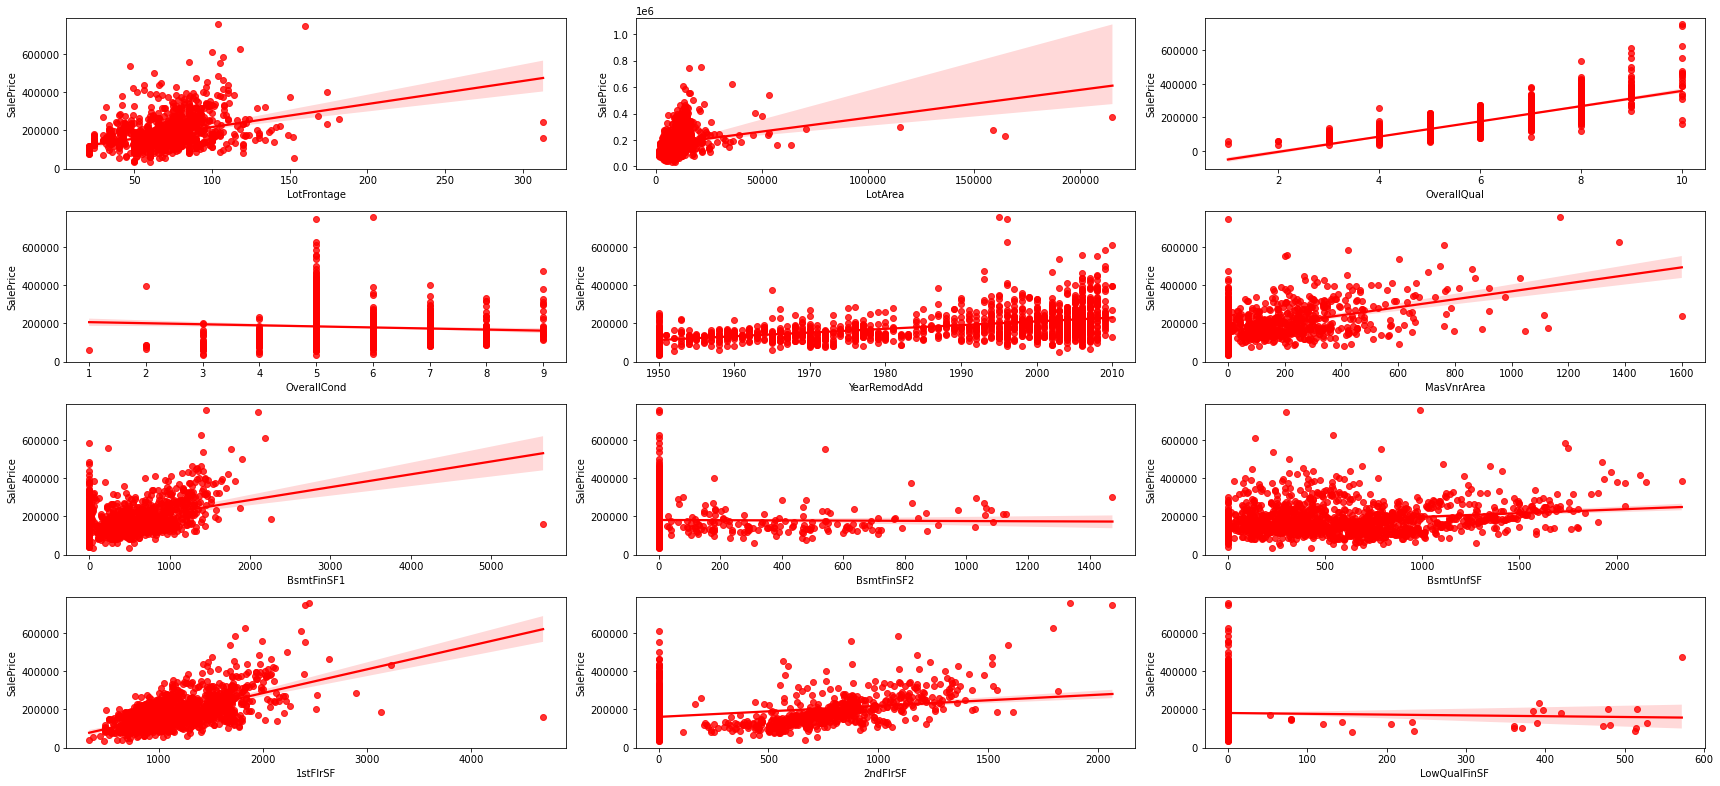

In [15]:
fig=plt.subplots(figsize=(24, 24))

for i, col in enumerate(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                         'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.regplot(housing[col], housing['SalePrice'], color = 'red')
    plt.tight_layout()

## Observations -
#### 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea' are showing positive correlation with SalePrice Overall quality are discrete values but showing a positive correlation

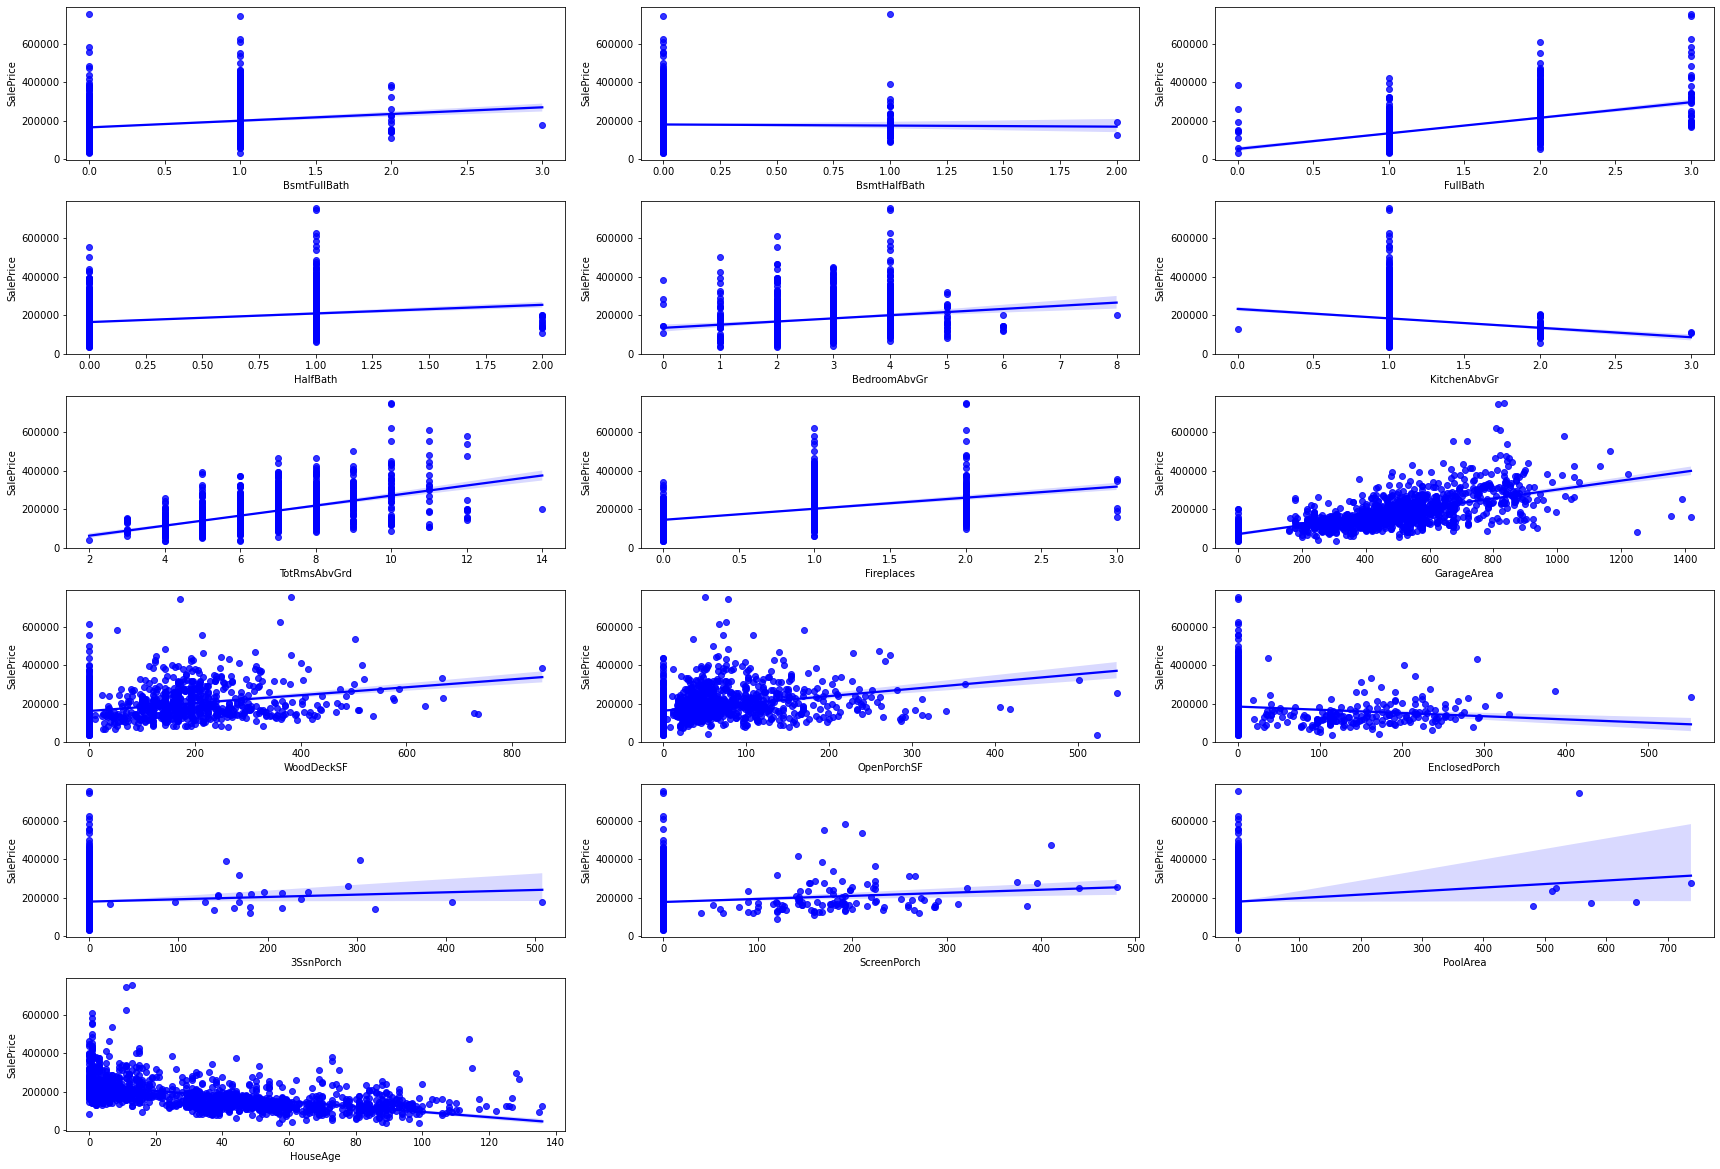

In [16]:
fig=plt.subplots(figsize=(24, 24))

for i, col in enumerate(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                         'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                         'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','HouseAge']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.regplot(housing[col], housing['SalePrice'], color = 'blue')
    plt.tight_layout()

## Outlier Treatment

In [17]:
def outlier_detect(df,col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_outlier = sum(df[col] < (df[col].quantile(0.25)-1.5*IQR))
    upper_outlier = sum(df[col] > (df[col].quantile(0.75)+1.5*IQR))
    total_outlier = lower_outlier + upper_outlier
    outlier_percent = round((lower_outlier + upper_outlier)*100/len(df[col]),2)
    return outlier_percent

# This function will calculate outlier percentage of each column

In [18]:
for column in housing.select_dtypes(include=['int64','float64']).columns:
    x = outlier_detect(housing,col = column)
    print("\n" + column + " : " +  str(x))


LotFrontage : 6.03

LotArea : 4.73

OverallQual : 0.14

OverallCond : 8.56

YearRemodAdd : 0.0

MasVnrArea : 6.58

BsmtFinSF1 : 0.48

BsmtFinSF2 : 11.44

BsmtUnfSF : 1.99

1stFlrSF : 1.37

2ndFlrSF : 0.14

LowQualFinSF : 1.78

BsmtFullBath : 0.07

BsmtHalfBath : 5.62

FullBath : 0.0

HalfBath : 0.0

BedroomAbvGr : 2.4

KitchenAbvGr : 4.66

TotRmsAbvGrd : 2.05

Fireplaces : 0.34

GarageArea : 1.44

WoodDeckSF : 2.19

OpenPorchSF : 5.27

EnclosedPorch : 14.25

3SsnPorch : 1.64

ScreenPorch : 7.95

PoolArea : 0.48

MiscVal : 3.56

SalePrice : 4.18

HouseAge : 0.55


#### There are some variables like 'OverallCond','EnclosedPorch','MasVnrArea' which has high amount of outliers. Let's see their distributions


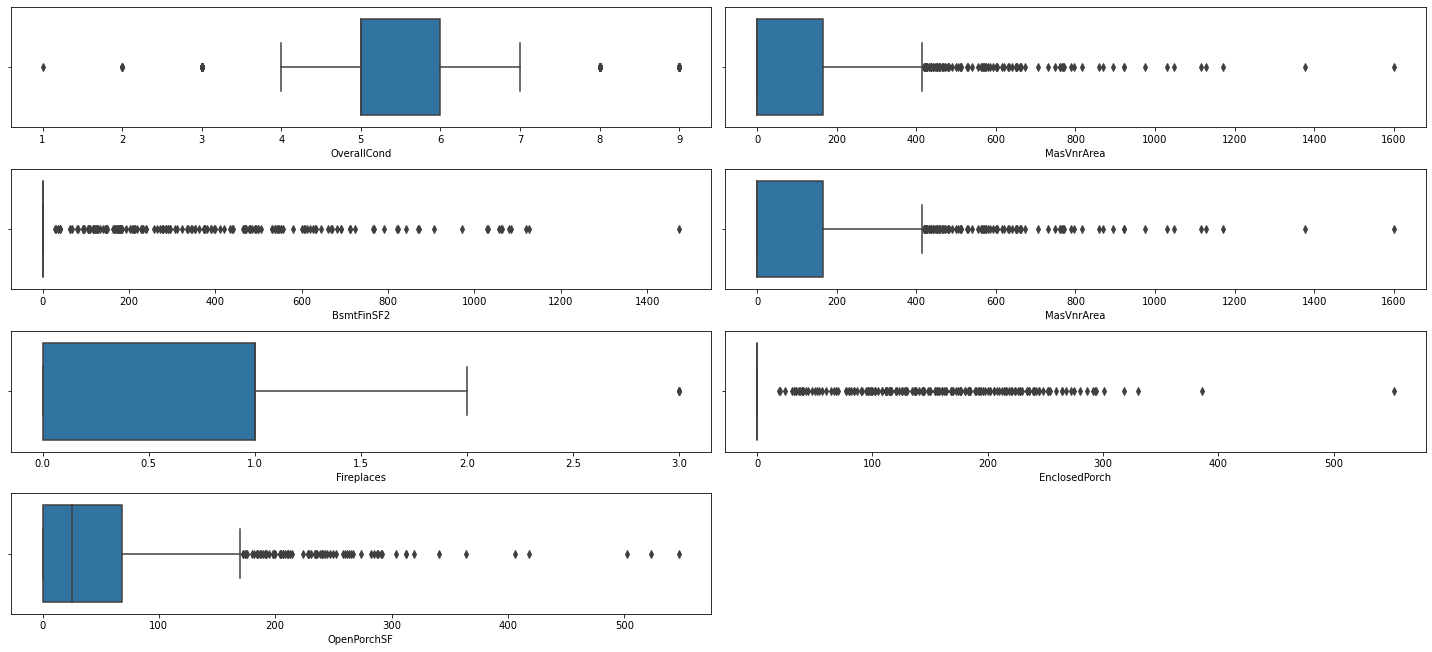

In [19]:
fig=plt.subplots(figsize=(20,20))

for i, feature in enumerate(['OverallCond', 'MasVnrArea', 'BsmtFinSF2', 'MasVnrArea', 'Fireplaces','EnclosedPorch','OpenPorchSF']):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(housing[feature])
    plt.tight_layout()

###### Treating outliers with ceiling value of 1.5 IQR may be considered here but we may risk loosing a lot of important information especially for features like 'Enclosed Porch', 'BsmtFitSF2'. Rather we will do a scaling before regression to handle this problem.

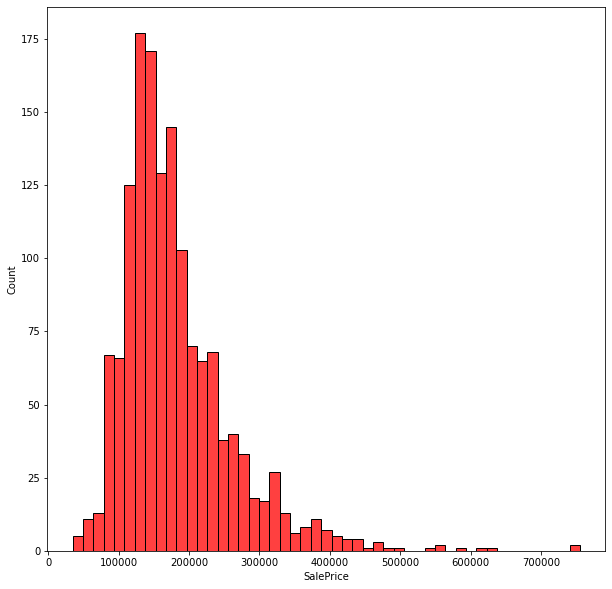

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(housing['SalePrice'], color = "red")
plt.show()

In [21]:
## Clearly, the distribution is skewed. We can try to make it gaussian with log transformation

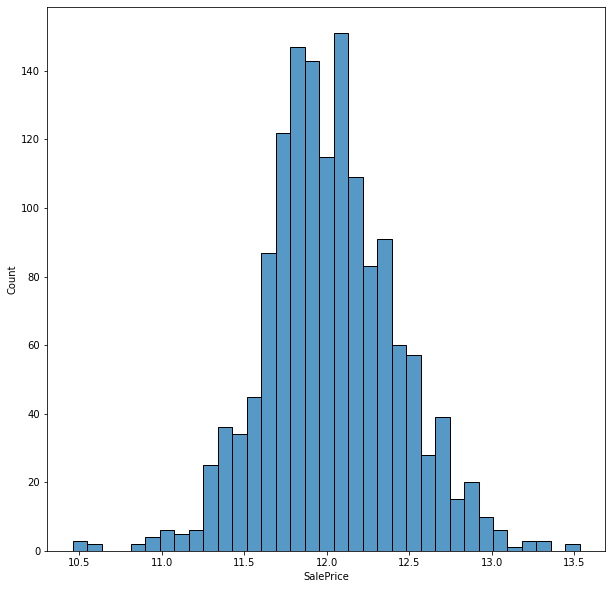

In [22]:
plt.figure(figsize=(10,10))
sns.histplot(np.log(housing['SalePrice']))
plt.show()

In [23]:
## It will be better if we use the log transformed value as outcome variable

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

## Analysis of Categorical data

### Missing Value Treatment

In [25]:
cat_housing = housing.select_dtypes(include='object')
a = cat_housing.isnull().sum() * 100 / len(cat_housing)
print(a[a>0])

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [26]:
category = ['Alley','MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','Electrical', 'BsmtFinType2', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'FireplaceQu','PoolQC' ,'Fence' ,'MiscFeature']
housing[category] = housing[category].fillna(value='Not_applicable', axis=1)

In [27]:
housing.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
SaleType           0
SaleCondition      0
SalePrice          0
HouseAge           0
Length: 74, dtype: int64

In [28]:
def bivariate_boxplot(df,col):
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(15,7))
    ax[0].set_title("Distribution Plot")
    sns.countplot(df[col],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data =df, x=col,y= 'SalePrice', ax=ax[1],orient='v')
    plt.show()


1.01  MSSubClass -  Exploratory analysis


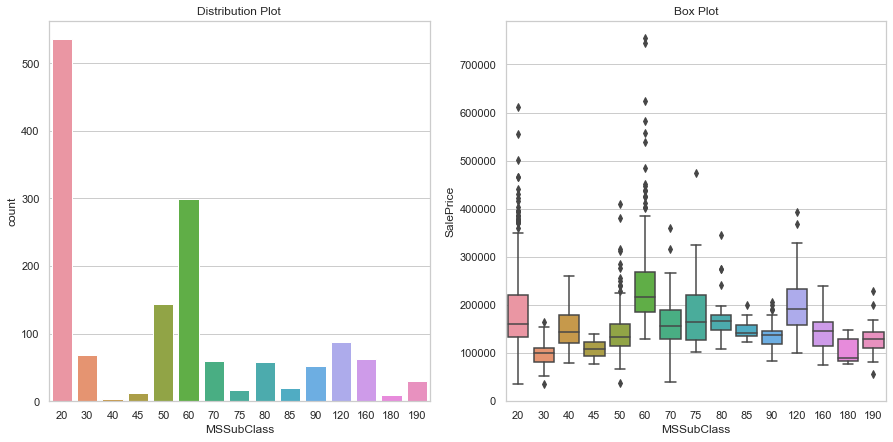


1.02  MSZoning -  Exploratory analysis


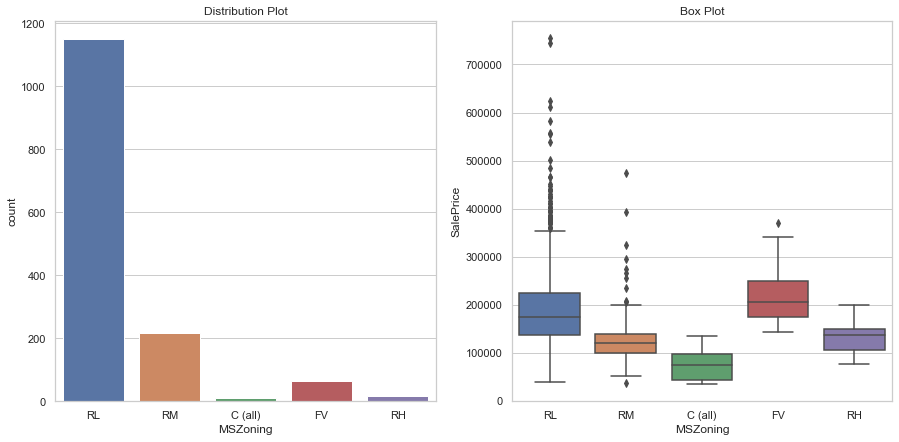


1.03  Street -  Exploratory analysis


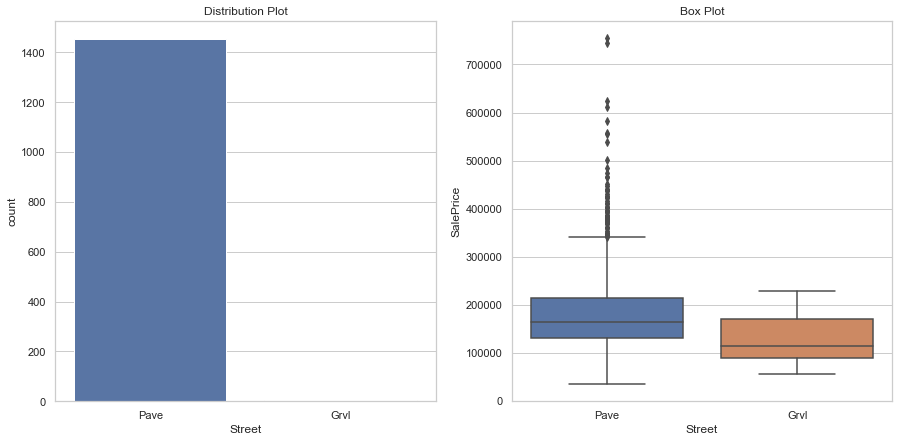


1.04  Alley -  Exploratory analysis


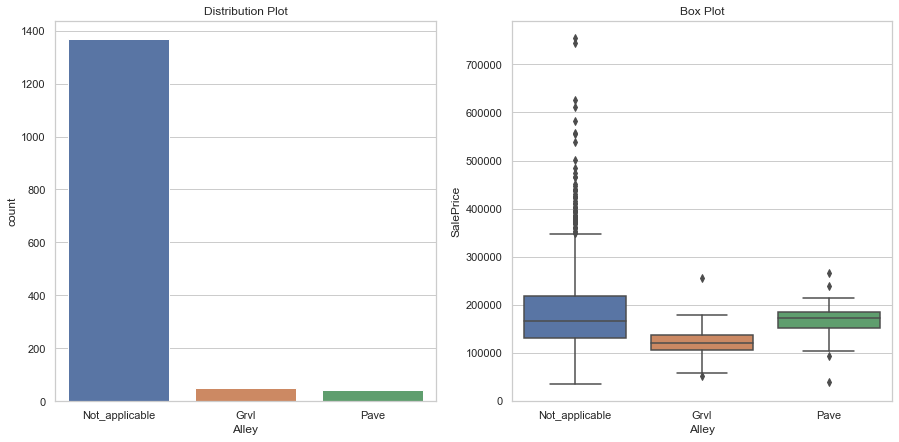


1.05  LotShape -  Exploratory analysis


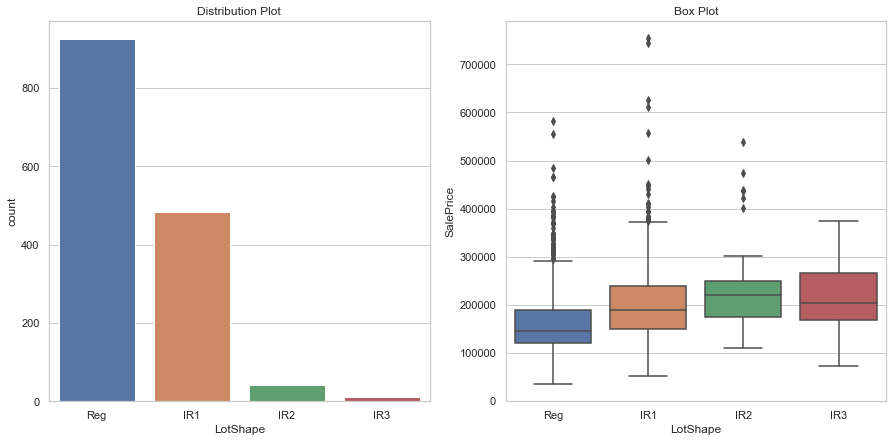


1.06  LandContour -  Exploratory analysis


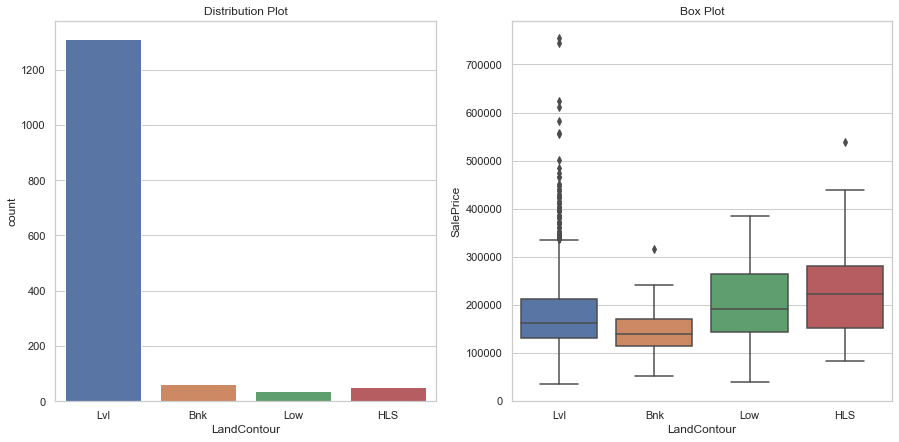


1.07  Utilities -  Exploratory analysis


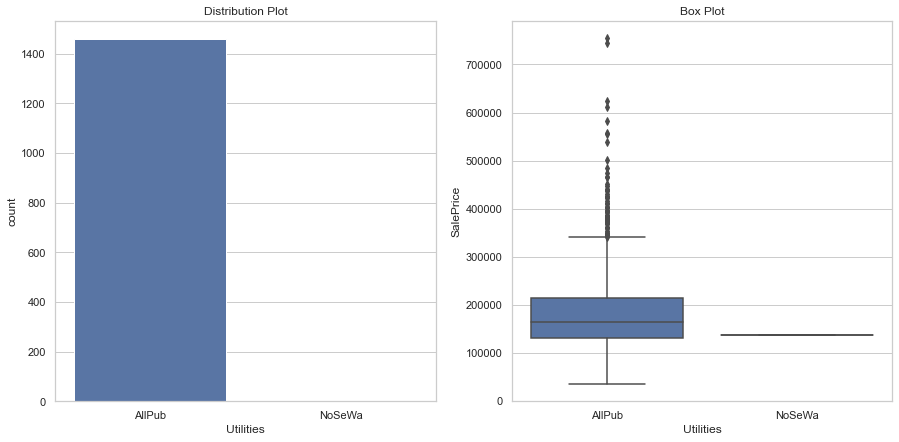


1.08  LotConfig -  Exploratory analysis


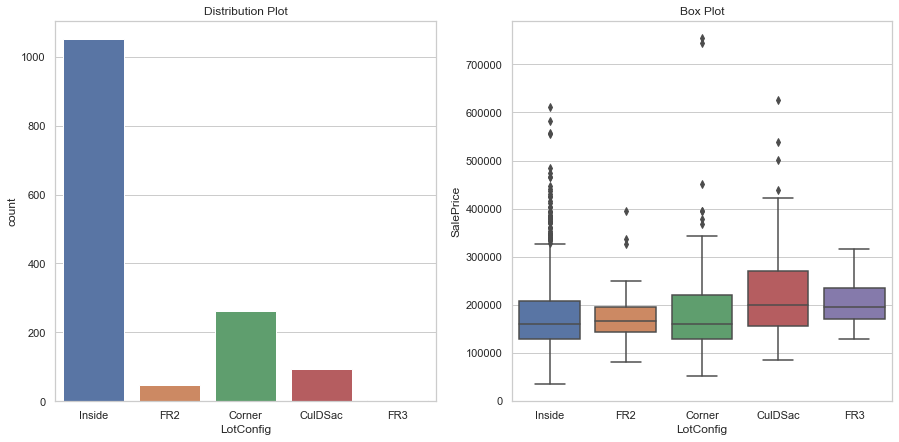


1.09  LandSlope -  Exploratory analysis


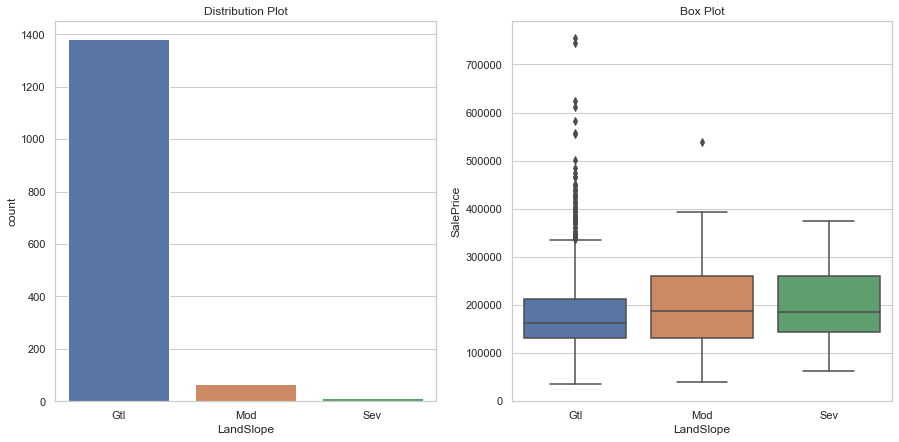


1.1  Neighborhood -  Exploratory analysis


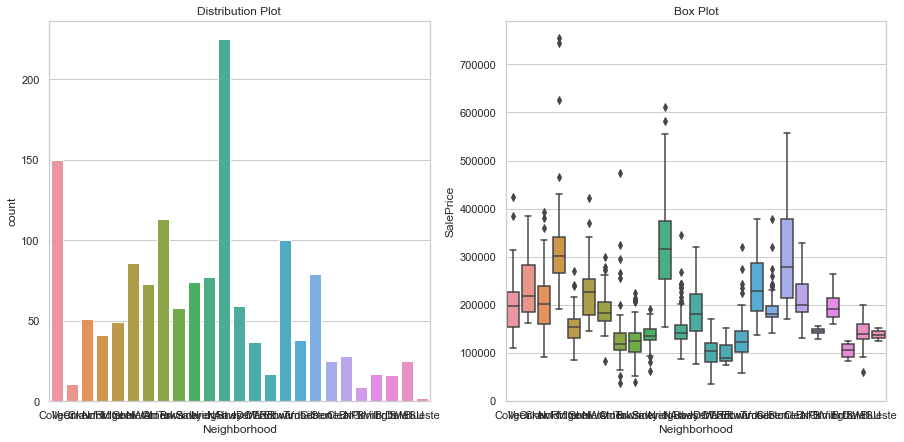


1.11  Condition1 -  Exploratory analysis


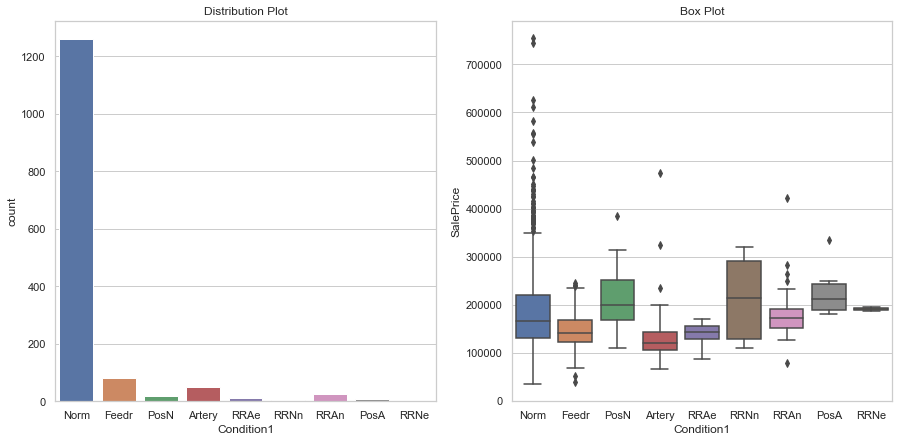


1.12  Condition2 -  Exploratory analysis


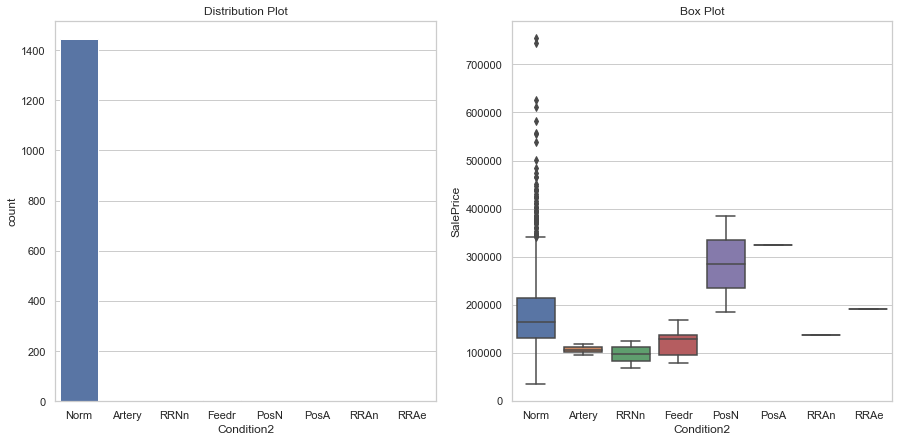


1.13  BldgType -  Exploratory analysis


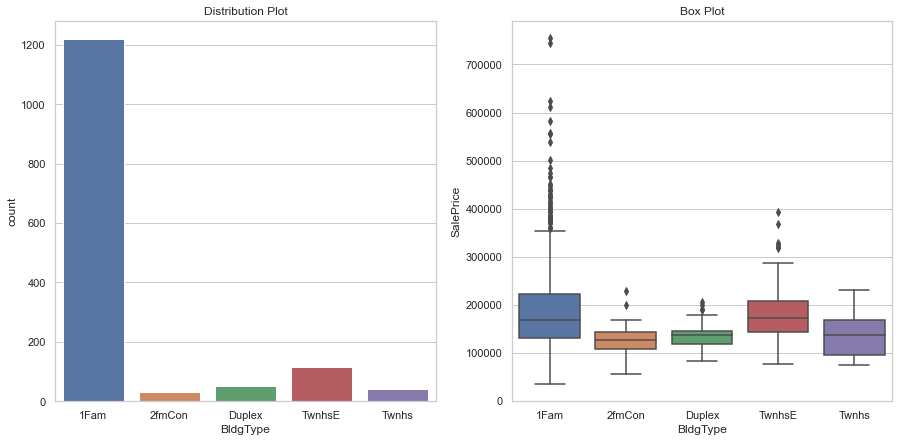


1.14  HouseStyle -  Exploratory analysis


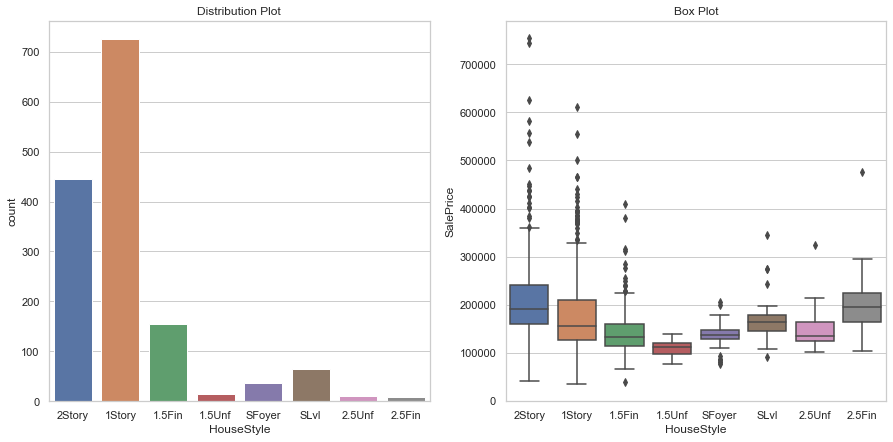


1.15  RoofStyle -  Exploratory analysis


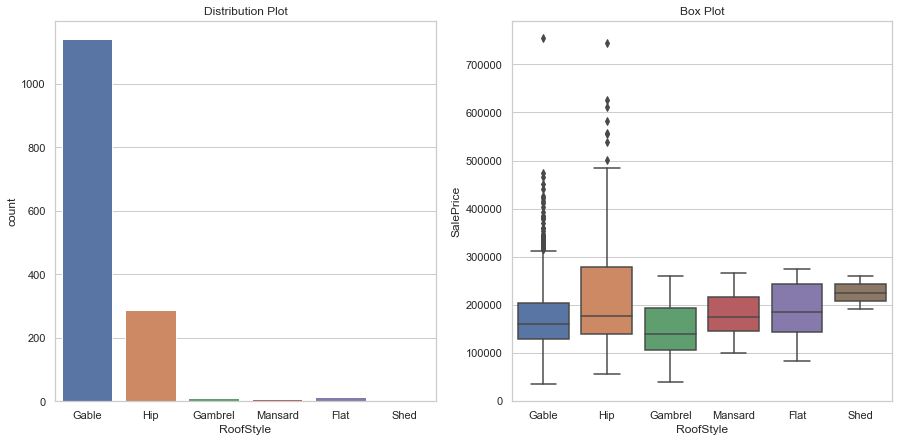


1.16  RoofMatl -  Exploratory analysis


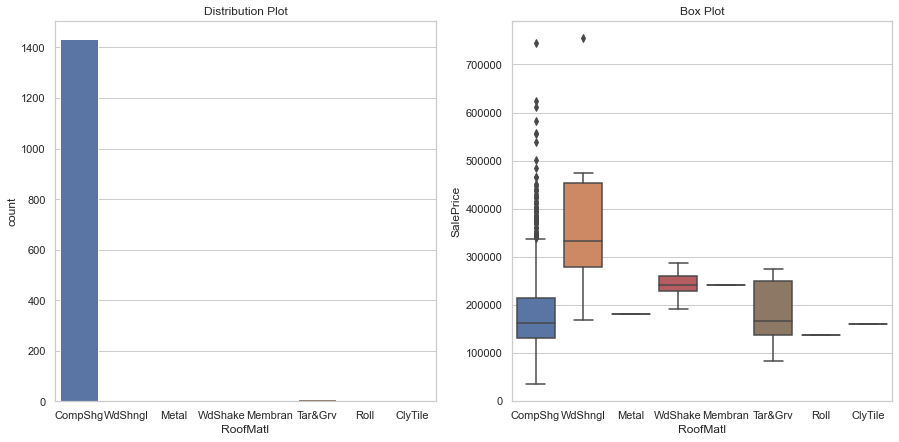


1.17  Exterior1st -  Exploratory analysis


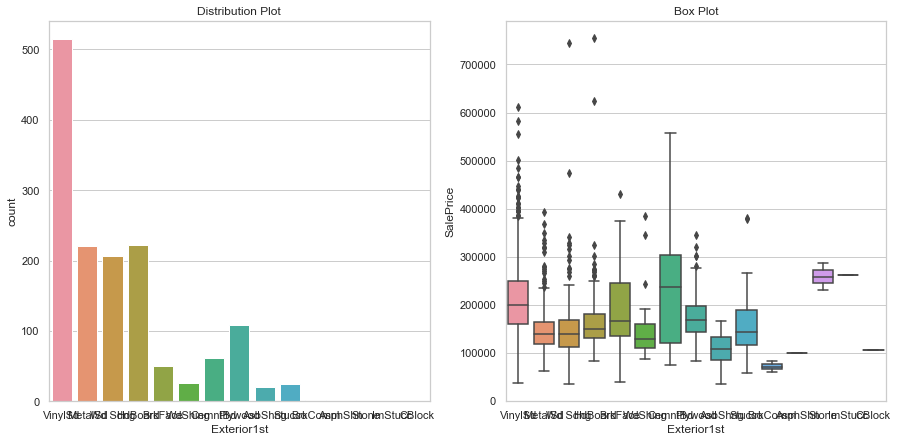


1.18  Exterior2nd -  Exploratory analysis


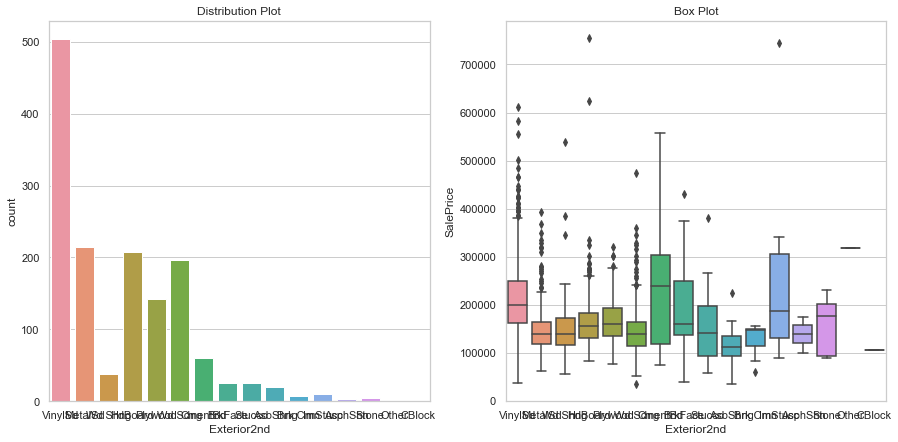


1.19  MasVnrType -  Exploratory analysis


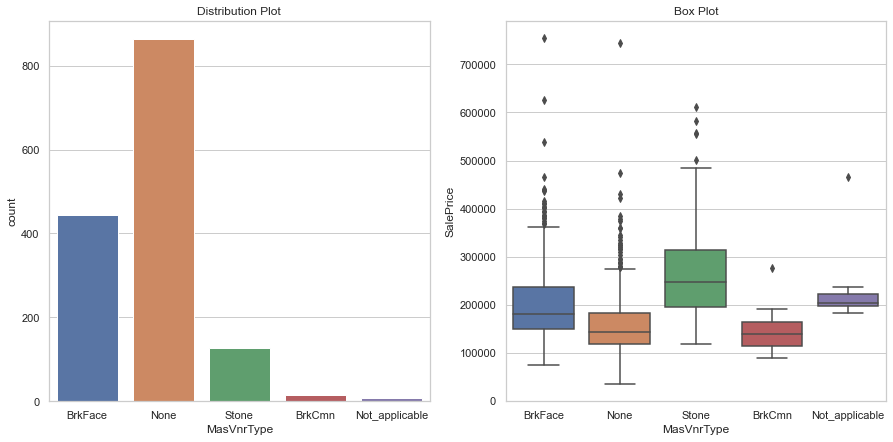


1.2  ExterQual -  Exploratory analysis


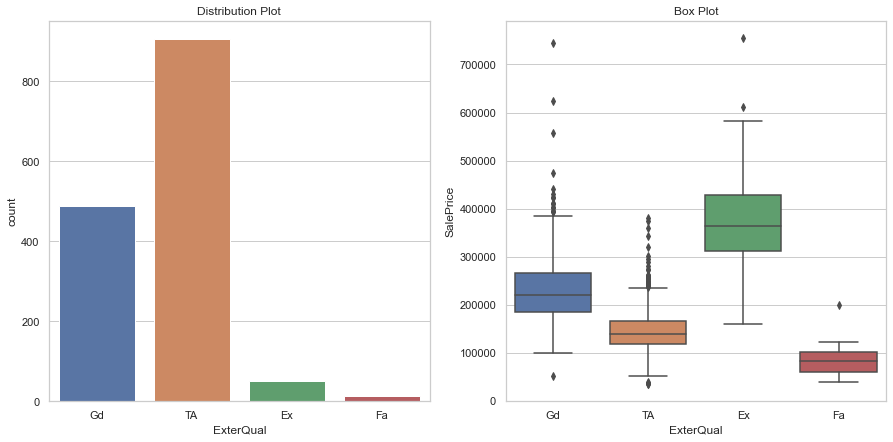


1.21  ExterCond -  Exploratory analysis


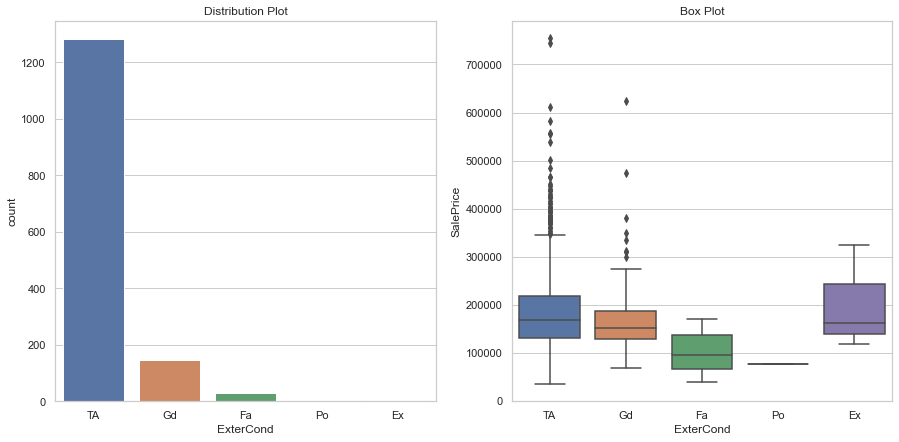


1.22  Foundation -  Exploratory analysis


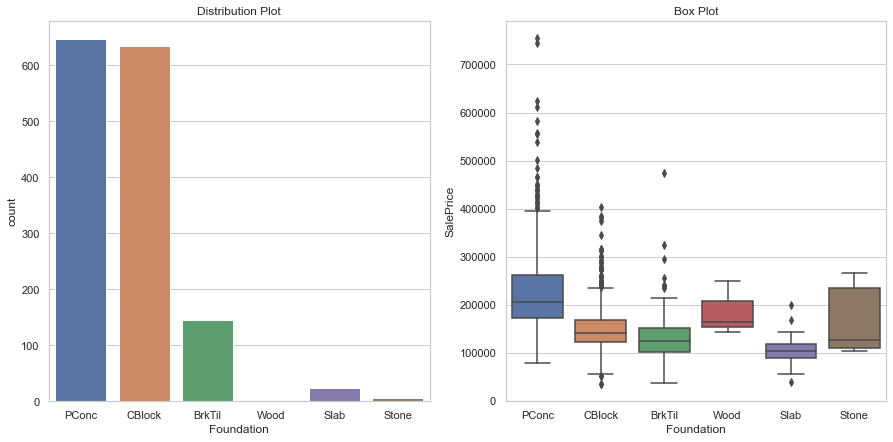


1.23  BsmtQual -  Exploratory analysis


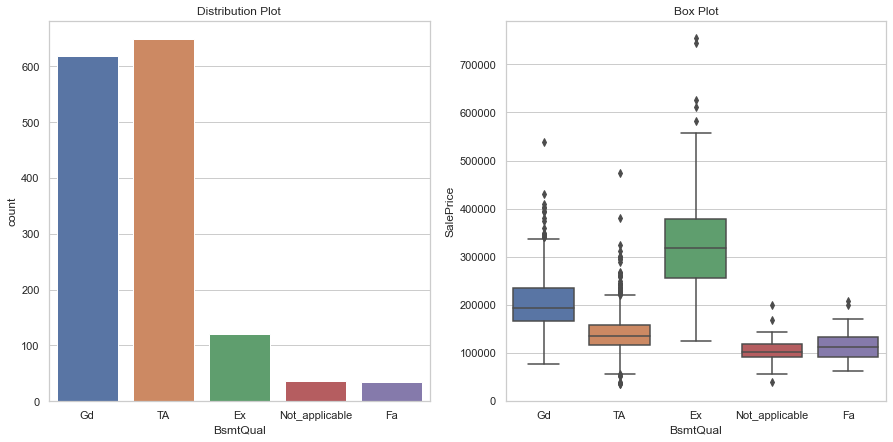


1.24  BsmtCond -  Exploratory analysis


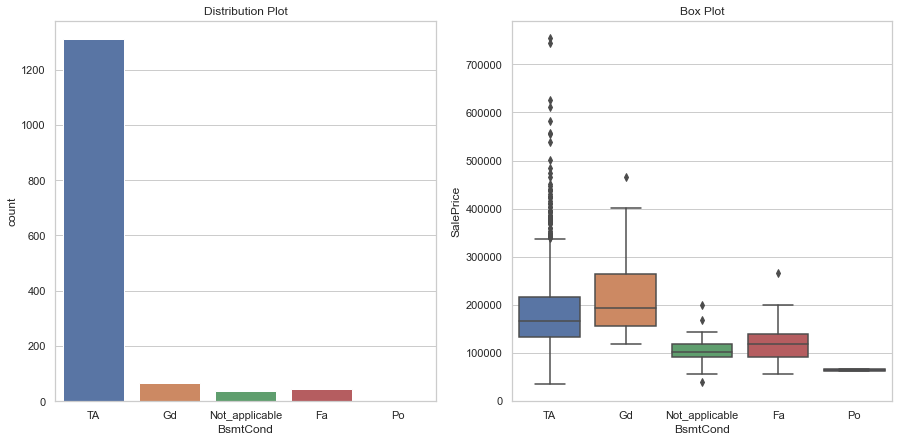


1.25  BsmtExposure -  Exploratory analysis


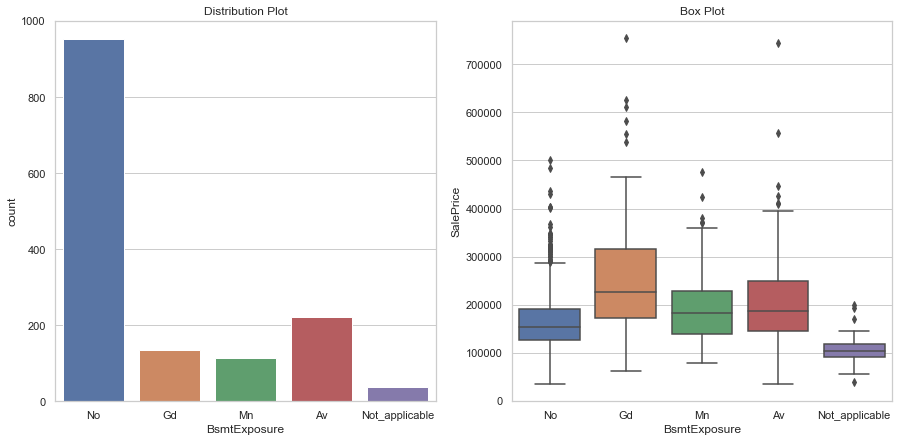


1.26  BsmtFinType1 -  Exploratory analysis


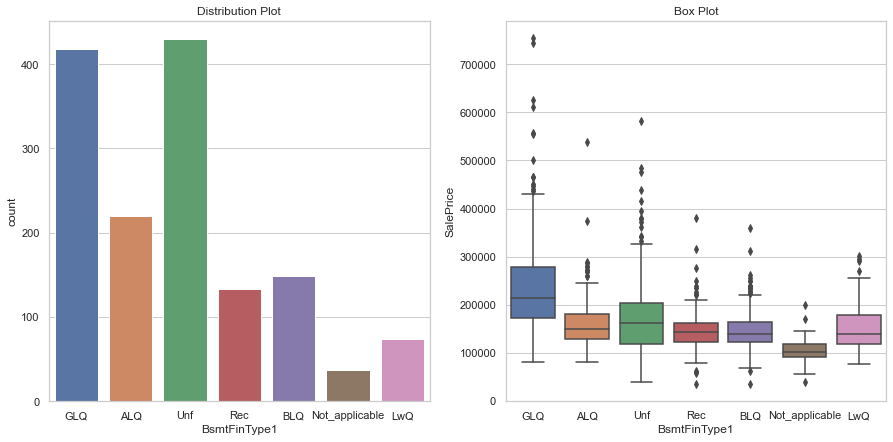


1.27  BsmtFinType2 -  Exploratory analysis


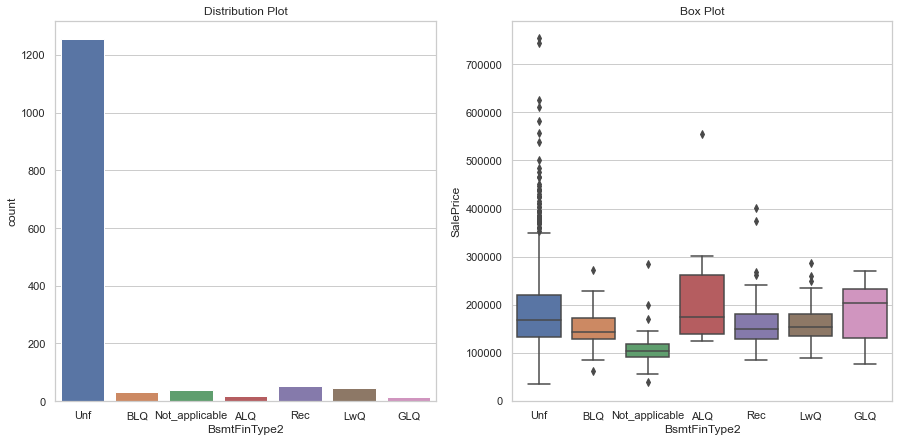


1.28  Heating -  Exploratory analysis


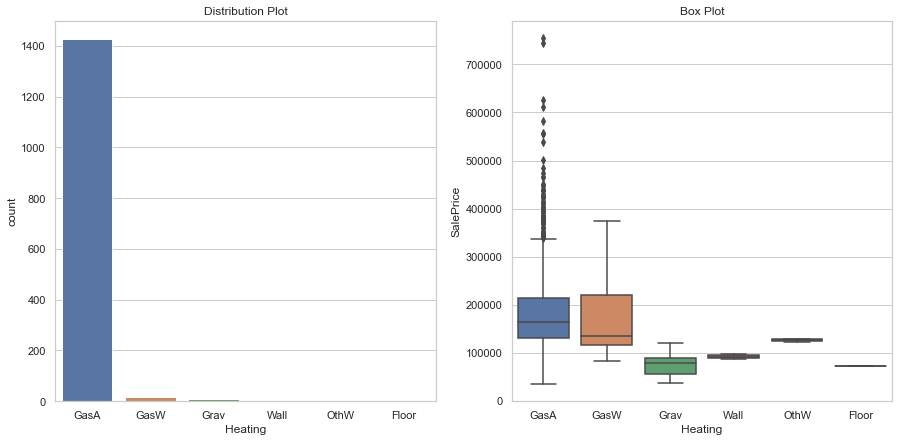


1.29  HeatingQC -  Exploratory analysis


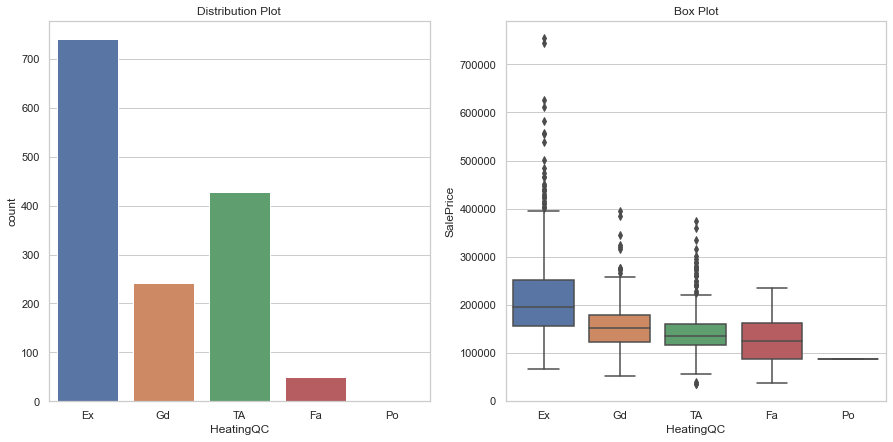


1.3  CentralAir -  Exploratory analysis


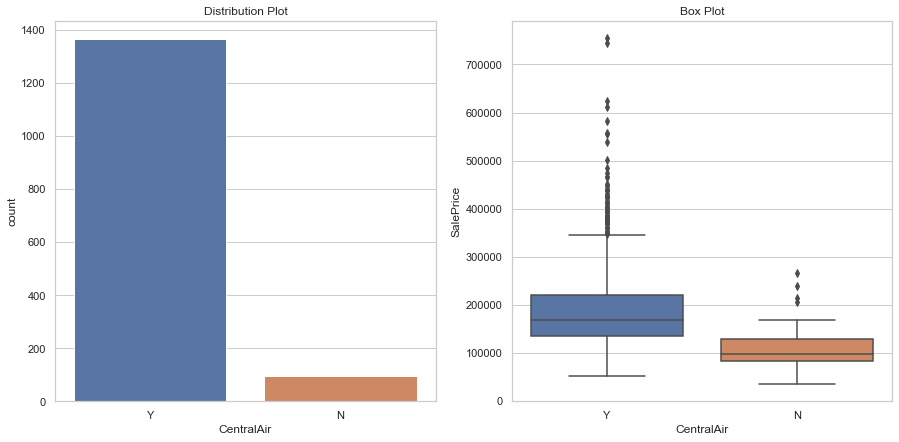


1.31  Electrical -  Exploratory analysis


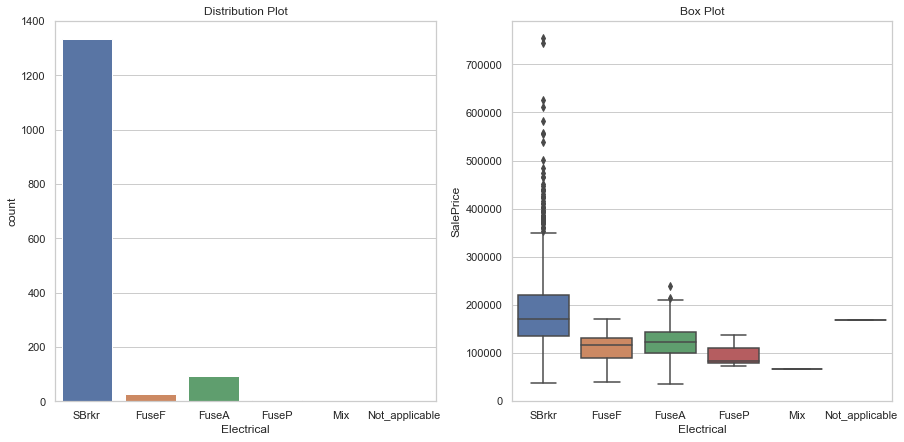


1.32  KitchenQual -  Exploratory analysis


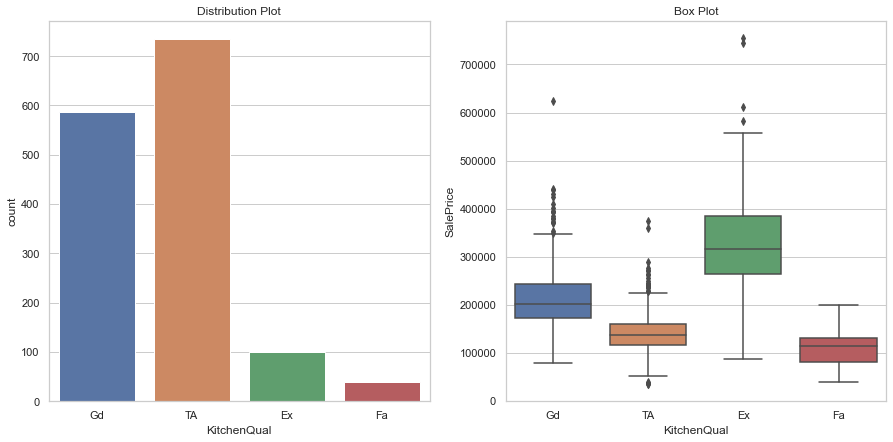


1.33  Functional -  Exploratory analysis


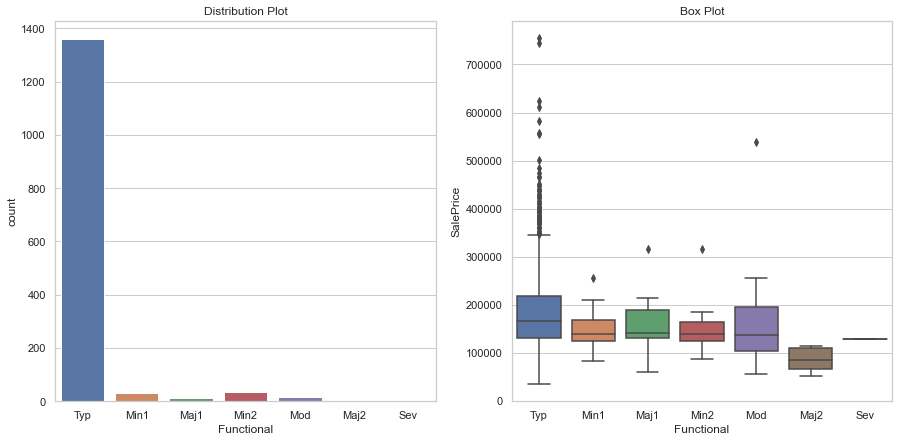


1.34  FireplaceQu -  Exploratory analysis


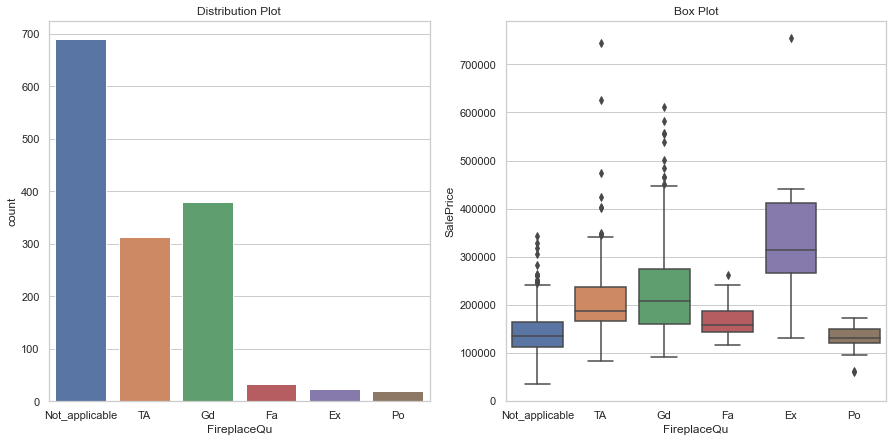


1.35  GarageType -  Exploratory analysis


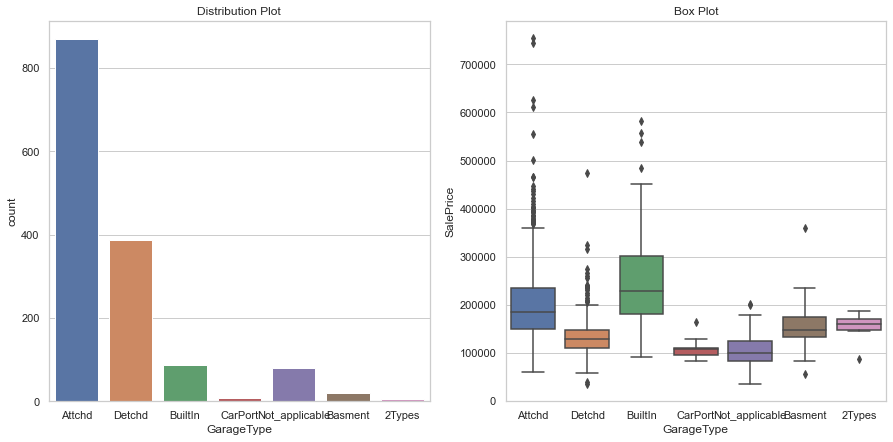


1.36  GarageFinish -  Exploratory analysis


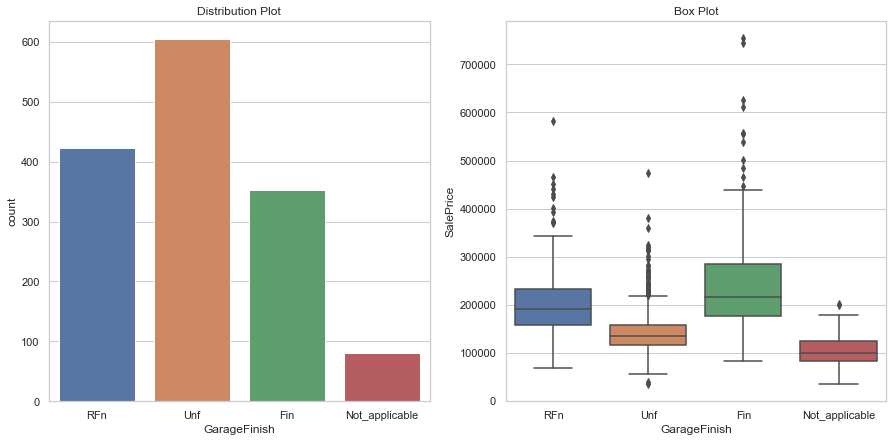


1.37  GarageQual -  Exploratory analysis


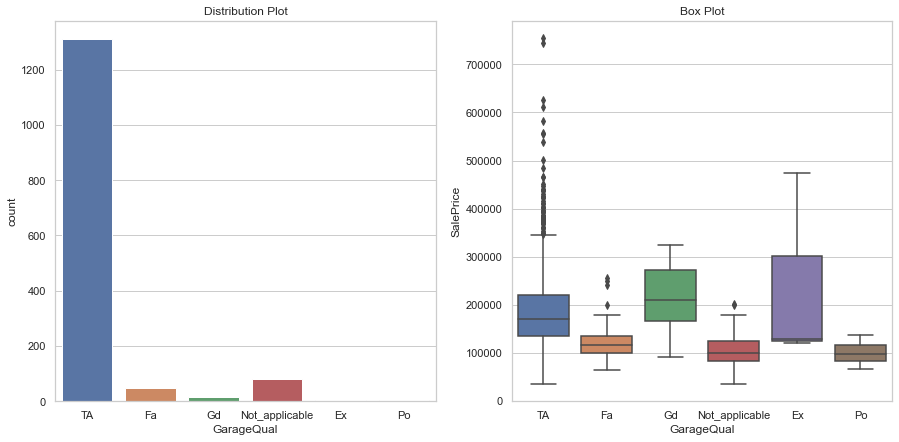


1.38  GarageCond -  Exploratory analysis


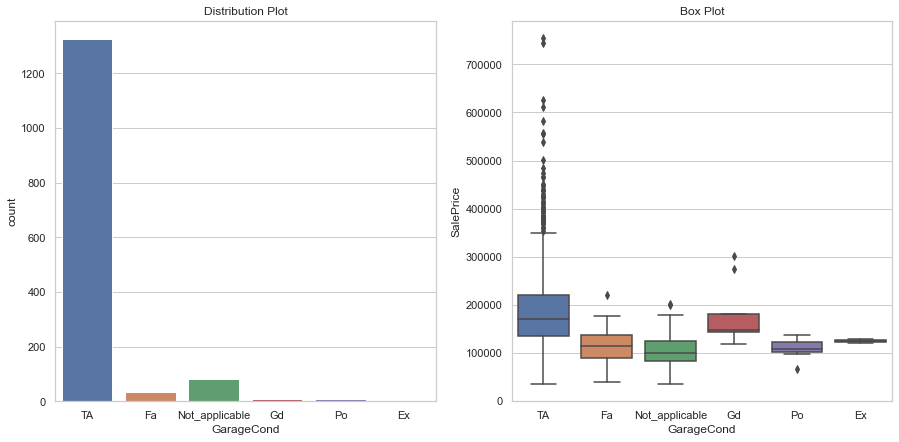


1.39  PavedDrive -  Exploratory analysis


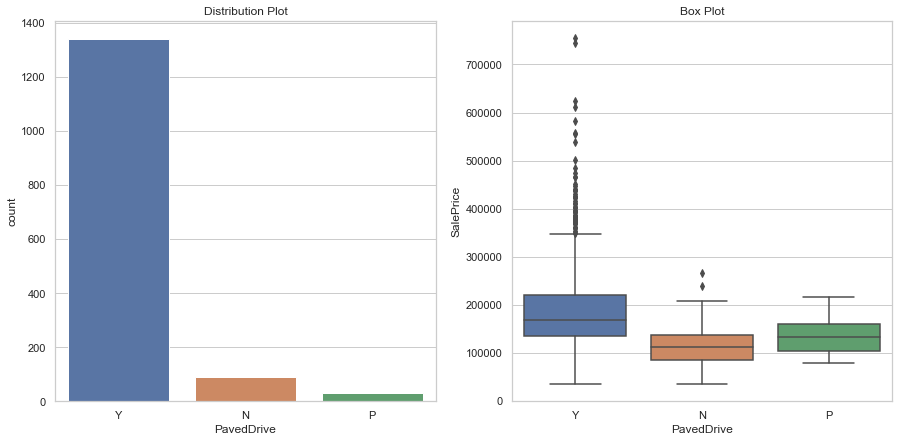


1.4  PoolQC -  Exploratory analysis


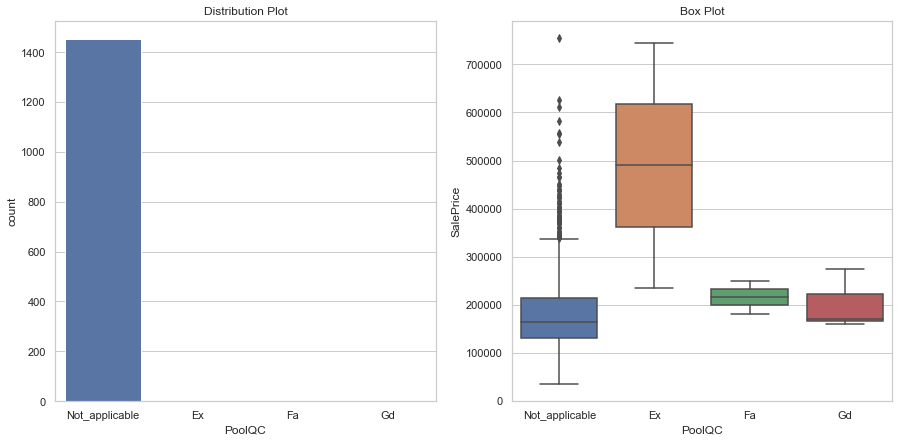


1.41  Fence -  Exploratory analysis


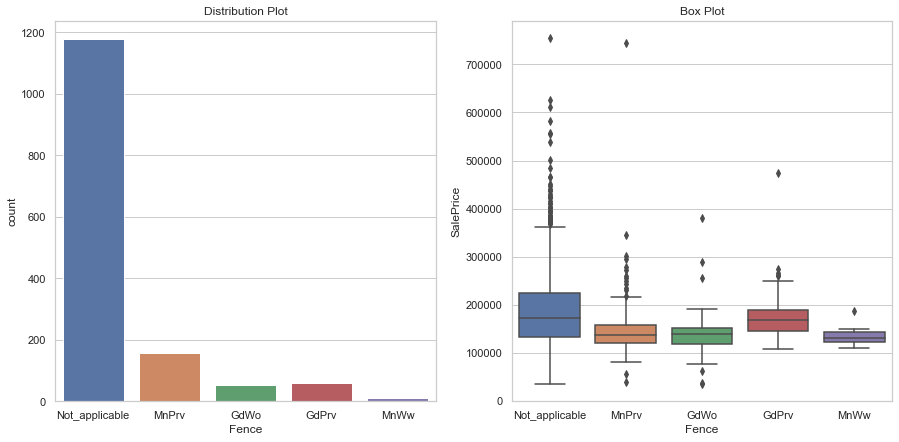


1.42  MiscFeature -  Exploratory analysis


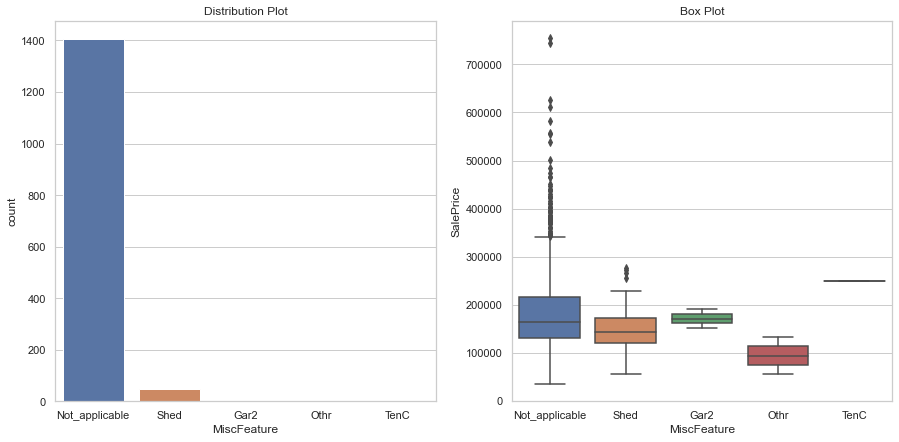


1.43  SaleType -  Exploratory analysis


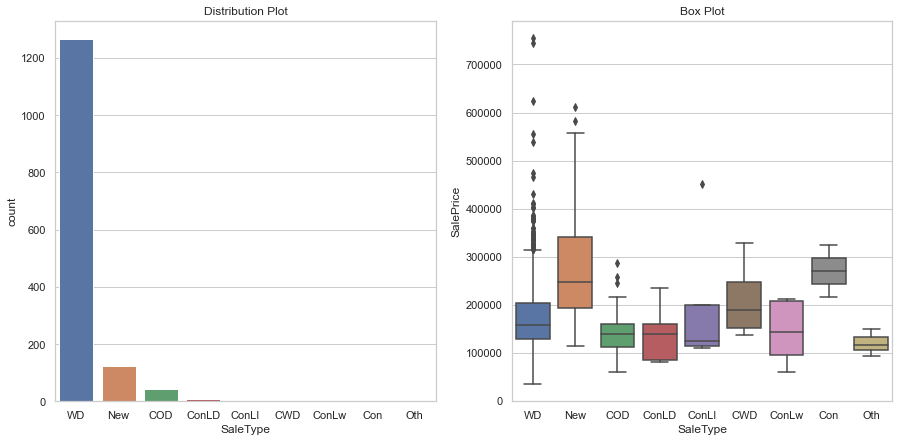


1.44  SaleCondition -  Exploratory analysis


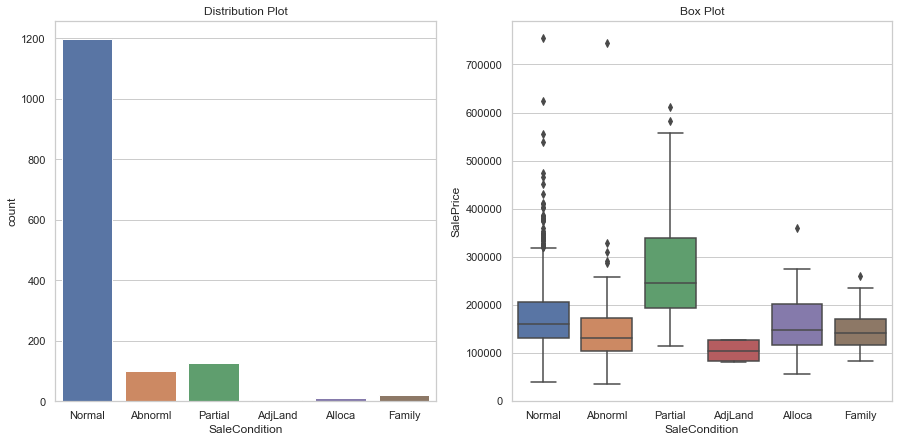

In [29]:
i= float(1.01)
for column in housing.select_dtypes(include='object').columns:
    print("\n" + str(round(i,2)) + "  " + column + " -  Exploratory analysis")
    bivariate_boxplot(housing, col = column)
    i = i + 0.01

### Encoding of ordered categorical variables

In [30]:
housing['LotShape'] = housing['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing['Utilities'] = housing['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing['LandSlope'] = housing['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing['HouseStyle'] = housing['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing['ExterQual'] = housing['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['ExterCond'] = housing['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual'] = housing['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC'] = housing['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual'] = housing['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond'] = housing['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['Functional'] = housing['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

## Dummy Variables

In [32]:
cat_housing = housing.select_dtypes(include='object')
cat_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LandContour    1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   Neighborhood   1460 non-null   object
 7   Condition1     1460 non-null   object
 8   Condition2     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  RoofMatl       1460 non-null   object
 12  Exterior1st    1460 non-null   object
 13  Exterior2nd    1460 non-null   object
 14  MasVnrType     1460 non-null   object
 15  Foundation     1460 non-null   object
 16  Heating        1460 non-null   object
 17  Electrical     1460 non-null   object
 18  GarageType     1460 non-null

In [33]:
cat_housing.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
categorical_variables = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
                         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle',
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                         'Heating', 'Electrical', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence',
                         'MiscFeature', 'SaleType', 'SaleCondition']

In [35]:
dummy_df = pd.get_dummies(housing[categorical_variables], drop_first=True)

In [36]:
dummy_df.shape

(1460, 163)

In [37]:
dummy_df.describe()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.047260,0.002740,0.008219,0.098630,0.204795,0.041096,0.010959,0.039726,0.013699,0.035616,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.212268,0.052289,0.090317,0.298267,0.403690,0.198580,0.104145,0.195382,0.116277,0.185395,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The number of dummy variables are quite high. many of them has very low occurence. We can filter them out and include only with higher prevalence.

In [38]:
drop_columns = []
for col in dummy_df.columns:
    if dummy_df[col].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        drop_columns.append(col)

print(drop_columns)

['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyl

In [39]:
dummy_df = dummy_df.drop(drop_columns, axis=1)

In [40]:
print(dummy_df.shape)

(1460, 55)


In [41]:
# Adding the dummy variables to the original dataframe
housing = pd.concat([housing,dummy_df],axis=1)

# Dropping the redundant columns
housing= housing.drop(categorical_variables,axis=1)

In [42]:
housing.shape

(1460, 104)

In [43]:
housing.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,...,GarageType_Not_applicable,PavedDrive_Y,PoolQC_Not_applicable,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,3,3,0,3,7,5,2003,196.0,...,0,1,1,0,1,1,0,1,1,0
1,80.0,9600,3,3,0,0,6,8,1976,0.0,...,0,1,1,0,1,1,0,1,1,0
2,68.0,11250,0,3,0,3,7,5,2002,162.0,...,0,1,1,0,1,1,0,1,1,0
3,60.0,9550,0,3,0,3,7,5,1970,0.0,...,0,1,1,0,1,1,0,1,0,0
4,84.0,14260,0,3,0,3,8,5,2000,350.0,...,0,1,1,0,1,1,0,1,1,0


## Split into Train and Test dataset

In [44]:
X = housing.drop(['SalePrice'], axis = 1)

In [45]:
y = np.log(housing['SalePrice']) # During EDA, we discussed to take log transformed value of house sale price

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((1168, 103), (292, 103), (1168,), (292,))

## Imputing missing value

In [48]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [50]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [51]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [52]:
X_train['LotFrontage'].isnull().sum(), X_test['LotFrontage'].isnull().sum()

(0, 0)

In [53]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['MasVnrArea']])
X_train[['MasVnrArea']] = si.transform(X_train[['MasVnrArea']])
X_test[['MasVnrArea']] = si.transform(X_test[['MasVnrArea']])
X_train['MasVnrArea'].isnull().sum(), X_test['MasVnrArea'].isnull().sum()


(0, 0)

## Scaling

In [54]:
rs = RobustScaler() # we are using Robustscaler to deal with outliers better than normalisazion/Standardization
rs.fit(X_train)

RobustScaler()

In [55]:
X_train_scaled = pd.DataFrame(data=rs.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=rs.transform(X_test), columns=X_test.columns)

In [56]:
X_train_scaled.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,...,GarageType_Not_applicable,PavedDrive_Y,PoolQC_Not_applicable,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,-0.546529,-0.538776,0.0,0.0,0.0,2.000000,-0.5,0.0,-0.368421,1.188119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.842360,0.329042,-1.0,0.0,0.0,0.000000,1.0,0.0,0.263158,1.953795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.564582,0.264992,0.0,0.0,0.0,1.000000,0.5,0.0,0.105263,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.379863,-0.275542,0.0,0.0,0.0,0.666667,-0.5,2.0,-1.157895,0.000000,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.851491,-1.0,0.0,0.0,0.000000,-1.0,0.0,-0.578947,0.000000,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0


In [57]:
X_test_scaled.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,...,GarageType_Not_applicable,PavedDrive_Y,PoolQC_Not_applicable,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,1.120137,-0.486782,0.0,0.0,0.0,0.0,0.0,2.0,0.052632,0.000000,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,-0.546529,0.365463,0.0,0.0,0.0,0.0,-1.0,2.0,0.026316,0.000000,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
2,0.064582,0.719372,-1.0,0.0,0.0,1.0,0.0,0.0,0.210526,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.879863,-0.682198,0.0,0.0,0.0,1.0,0.0,1.0,-1.157895,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.231249,0.943422,-1.0,0.0,0.0,0.0,-0.5,0.0,-0.763158,0.712871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection by RFE

In [58]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, n_features_to_select = 30)             # running RFE
rfe = rfe.fit(X_train_scaled, y_train)

In [59]:
top_cols = []
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

for i in rfe_ranking:
    if i[1]:
            top_cols.append(i[0])
print(top_cols)

['Utilities', 'LandSlope', 'OverallQual', 'YearRemodAdd', 'BsmtFinType1', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenAbvGr', 'Functional', 'FireplaceQu', 'GarageQual', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'GarageType_Not_applicable', 'PoolQC_Not_applicable', 'SaleType_New', 'SaleCondition_Normal']


In [60]:
X_train_ols = sm.add_constant(X_train_scaled[top_cols])
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     256.8
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:45:20   Log-Likelihood:                 646.41
No. Observations:                1168   AIC:                            -1231.
Df Residuals:                    1137   BIC:                            -1074.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [61]:
# Repeat same RFE with the output number of the variable equal to 40
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, n_features_to_select = 40)             # running RFE
rfe = rfe.fit(X_train_scaled, y_train)



In [62]:
top_cols = []
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

for i in rfe_ranking:
    if i[1]:
        top_cols.append(i[0])
print(top_cols)


X_train_ols = sm.add_constant(X_train_scaled[top_cols])
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
print(lin_reg.summary())

['Utilities', 'LandSlope', 'OverallQual', 'YearRemodAdd', 'BsmtFinType1', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'GarageType_Not_applicable', 'PavedDrive_Y', 'PoolQC_Not_applicable', 'SaleType_New', 'SaleCondition_Normal']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Leas

In [64]:
# Repeat same RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, n_features_to_select = 50)             # running RFE
rfe = rfe.fit(X_train_scaled, y_train)


top_cols = []
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

for i in rfe_ranking:
    if i[1]:
        top_cols.append(i[0])
print(top_cols)

X_train_ols = sm.add_constant(X_train_scaled[top_cols])
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
print(lin_reg.summary())



['Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtQual', 'BsmtFinType1', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'PoolQC_Not_applicable', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Partial']
                            OLS Regression Results                            
Dep. Variable:         

In [65]:
# Repeat same RFE with the output number of the variable equal to 60
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, n_features_to_select = 60)             # running RFE
rfe = rfe.fit(X_train_scaled, y_train)


top_cols = []
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

for i in rfe_ranking:
    if i[1]:
        top_cols.append(i[0])
print(top_cols)


X_train_ols = sm.add_constant(X_train_scaled[top_cols])
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
print(lin_reg.summary())

['Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual', 'MSSubClass_60', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LandContour_Lvl', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'Heating_GasA', 'Electrical_SBrkr', 'GarageType_Not_applicable', 'PavedDrive_Y'

#### Adjusted R2 is almost same for 50 features and 60 features. We can make final model with 50 features

## Final RFE model

In [66]:
# Repeat same RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, n_features_to_select = 50)             # running RFE
rfe = rfe.fit(X_train_scaled, y_train)


top_cols = []
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

for i in rfe_ranking:
    if i[1]:
        top_cols.append(i[0])
print(top_cols)


X_train_ols = sm.add_constant(X_train_scaled[top_cols])
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
print(lin_reg.summary())

['Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtQual', 'BsmtFinType1', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'PoolQC_Not_applicable', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Partial']
                            OLS Regression Results                            
Dep. Variable:         

### Let's see how the model performs in Test data

In [67]:
# Making predictions
y_pred = lm.predict(X_test_scaled)

In [68]:
# evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
print(r2)

0.8907935278035647


In [69]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print("RSS:" + str(rss))
mse = mean_squared_error(y_test, y_pred)
print("mse:" + str(mse))
rmse = mse**0.5
print("rmse:" + str(rmse))

RSS:6.197773090119773
mse:0.02122525030862936
rmse:0.14568888189779397


### create datasets with selected features for Ridge and Lasso Regression

In [70]:
X_train_rfe = X_train_scaled[top_cols]
X_test_rfe = X_test_scaled[top_cols]

In [71]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 15
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train_rfe, y_train)

Fitting 15 folds for each of 28 candidates, totalling 420 fits


GridSearchCV(cv=15, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [73]:
#Fitting Ridge model for alpha = 6
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.04793308  0.05434651  0.1329854   0.03247046  0.02904475  0.02917475
  0.05148663  0.06461783  0.11285484  0.08330635  0.0590592   0.01977005
  0.0526377   0.03919616 -0.04212649  0.03292713  0.04244589 -0.03569009
  0.02535829  0.03782822  0.03831257  0.02832309  0.04967893 -0.05144054
  0.03947628  0.065627   -0.08082618  0.066084    0.07173945  0.06409853
  0.06364211 -0.02704381  0.03609294 -0.04309221 -0.03803216 -0.00728306
 -0.05488004  0.02330127  0.03593231  0.02744848  0.05147554  0.03763263
 -0.02411772  0.03108581  0.03849379  0.17714175  0.04510907 -0.0282234
  0.05814277  0.01988324]


In [74]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)


r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train data")
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test data")
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss train data")
print(rss1_lr)


rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss test data")
print(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse train data")
print(mse_train_lr**0.5)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse test data")
print(mse_test_lr**0.5)

r2 train data
0.8845098962974658
r2 test data
0.8873602299630755
rss train data
20.30401648222035
rss test data
6.3926223562683475
rmse train data
0.13184678894582774
rmse test data
0.14796128654478335


In [75]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=6.0)'] = ridge.coef_

In [76]:
model_coefficients.sort_values(by='Ridge (alpha=6.0)', ascending=False)

,Ridge (alpha=6.0)
PoolQC_Not_applicable,0.177142
OverallQual,0.132985
1stFlrSF,0.112855
2ndFlrSF,0.083306
Neighborhood_Somerst,0.071739
Neighborhood_NridgHt,0.066084
LotConfig_CulDSac,0.065627
CentralAir,0.064618
Condition1_Norm,0.064099
Condition2_Norm,0.063642


In [77]:
# Top 10 predictors for Ridge
model_coefficients[['Ridge (alpha=6.0)']].sort_values(by='Ridge (alpha=6.0)', ascending=False).index[:10]

Index(['PoolQC_Not_applicable', 'OverallQual', '1stFlrSF', '2ndFlrSF',
       'Neighborhood_Somerst', 'Neighborhood_NridgHt', 'LotConfig_CulDSac',
       'CentralAir', 'Condition1_Norm', 'Condition2_Norm'],
      dtype='object')

## Lasso Regression

In [78]:
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 15
model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_rfe, y_train)

Fitting 15 folds for each of 29 candidates, totalling 435 fits


GridSearchCV(cv=15, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [80]:
#Fitting Lasso model for alpha = 0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
print(lasso.coef_)

[ 0.09189655  0.05498716  0.13413952  0.03100756  0.02930039  0.02623839
  0.05063275  0.06834381  0.1235645   0.09981725  0.06337002  0.02628211
  0.0485054   0.03565456 -0.04767358  0.03188799  0.03703985 -0.03779596
  0.02520839  0.03402238  0.03770883  0.03126963  0.05645099 -0.04442618
  0.07455079  0.06737839 -0.0862592   0.07162664  0.08229775  0.06114788
  0.09273919 -0.02734295  0.04355862 -0.05458917 -0.04722532 -0.0122656
 -0.06849106  0.03525969  0.04669677  0.03081623  0.06352649  0.03569221
 -0.02232286  0.04452246  0.03722072  0.44273111  0.07062079 -0.02592805
  0.05833686  0.        ]


In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train data")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test data")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss train data")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss test data")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("rmse train data")
print(mse_train_lr ** 0.5)
metric2.append(mse_train_lr ** 0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("rmse test data")
print(mse_test_lr ** 0.5)
metric2.append(mse_test_lr ** 0.5)

r2 train data
0.8869465894503368
r2 test data
0.8746880518615077
rss train data
19.875627760140446
rss test data
7.111803947354174
rmse train data
0.1304484748441366
rmse test data
0.15606246496320314


In [82]:
model_coefficients['Lasso (alpha=0.0001)'] = lasso.coef_

In [83]:
model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Ridge (alpha=6.0),Lasso (alpha=0.0001)
PoolQC_Not_applicable,0.177142,0.442731
OverallQual,0.132985,0.134140
1stFlrSF,0.112855,0.123565
2ndFlrSF,0.083306,0.099817
Condition2_Norm,0.063642,0.092739
Utilities,0.047933,0.091897
Neighborhood_Somerst,0.071739,0.082298
Street_Pave,0.039476,0.074551
Neighborhood_NridgHt,0.066084,0.071627
SaleType_New,0.045109,0.070621


In [84]:
# Top 10 predictors for Lasso
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['PoolQC_Not_applicable', 'OverallQual', '1stFlrSF', '2ndFlrSF',
       'Condition2_Norm', 'Utilities', 'Neighborhood_Somerst', 'Street_Pave',
       'Neighborhood_NridgHt', 'SaleType_New'],
      dtype='object')

## Question 1
### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?
### What will be the most important predictor variables after the change is implemented?

In [85]:
#Fitting Ridge model for alpha  6 * 2 = 12
alpha = 12
ridge_12 = Ridge(alpha=alpha)

ridge_12.fit(X_train_rfe, y_train)

y_pred_train = ridge_12.predict(X_train_rfe)
y_pred_test = ridge_12.predict(X_test_rfe)


r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train data")
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test data")
print(r2_test_lr)

r2 train data
0.8826226134811485
r2 test data
0.8884129137062466


In [86]:
model_coefficients['Ridge (alpha=12)'] = ridge_12.coef_
model_coefficients.sort_values(by='Ridge (alpha=12)', ascending=False)

,Ridge (alpha=6.0),Lasso (alpha=0.0001),Ridge (alpha=12)
OverallQual,0.132985,0.134140,0.131837
PoolQC_Not_applicable,0.177142,0.442731,0.109110
1stFlrSF,0.112855,0.123565,0.107444
2ndFlrSF,0.083306,0.099817,0.074680
Condition1_Norm,0.064099,0.061148,0.062749
Neighborhood_Somerst,0.071739,0.082298,0.062679
LotConfig_CulDSac,0.065627,0.067378,0.061437
CentralAir,0.064618,0.068344,0.058816
Neighborhood_NridgHt,0.066084,0.071627,0.058097
BsmtFullBath,0.059059,0.063370,0.056450


In [87]:
# Top 10 predictors for Ridge with alpha 12
model_coefficients[['Ridge (alpha=12)']].sort_values(by='Ridge (alpha=12)', ascending=False).index[:10]

Index(['OverallQual', 'PoolQC_Not_applicable', '1stFlrSF', '2ndFlrSF',
       'Condition1_Norm', 'Neighborhood_Somerst', 'LotConfig_CulDSac',
       'CentralAir', 'Neighborhood_NridgHt', 'BsmtFullBath'],
      dtype='object')

In [88]:
#Fitting Ridge model for alpha  0.0001 * 2 = 0.0002
alpha = 0.0002
lasso_2 = Lasso(alpha=alpha)

lasso_2.fit(X_train_rfe, y_train)

y_pred_train = lasso_2.predict(X_train_rfe)
y_pred_test = lasso_2.predict(X_test_rfe)


r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train data")
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test data")
print(r2_test_lr)

r2 train data
0.8863843987751046
r2 test data
0.87689900265227


In [89]:
model_coefficients['Lasso (alpha=0.0001)'] = lasso_2.coef_
model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False)
# Top 10 predictors for Ridge with alpha 0.0002
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['PoolQC_Not_applicable', 'OverallQual', '1stFlrSF', '2ndFlrSF',
       'Condition2_Norm', 'Neighborhood_Somerst', 'SaleType_New',
       'Neighborhood_NridgHt', 'LotConfig_CulDSac', 'CentralAir'],
      dtype='object')

## Question 3
### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
### You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [90]:
# Top 10 predictors for Lasso
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['PoolQC_Not_applicable', 'OverallQual', '1stFlrSF', '2ndFlrSF',
       'Condition2_Norm', 'Neighborhood_Somerst', 'SaleType_New',
       'Neighborhood_NridgHt', 'LotConfig_CulDSac', 'CentralAir'],
      dtype='object')

In [91]:
feature_remove = ['PoolQC_Not_applicable', 'OverallQual', '1stFlrSF', '2ndFlrSF','Condition2_Norm']

X_train_rfe_2 = X_train_rfe.drop(feature_remove, axis = 1)
X_test_rfe_2 = X_test_rfe.drop(feature_remove, axis = 1)

X_train_rfe_2.shape, X_test_rfe_2.shape

((1168, 45), (292, 45))

In [92]:
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_rfe_2, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [94]:
#Fitting Lasso model for alpha = 0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe_2, y_train)

Lasso(alpha=0.0001)

In [95]:
model_coefficients_2 = pd.DataFrame(index=X_test_rfe_2.columns)
model_coefficients_2.rows = X_test_rfe_2.columns

model_coefficients_2['Lasso_coef'] = lasso.coef_

In [96]:
# Top 10 predictors for Lasso
model_coefficients_2[['Lasso_coef']].sort_values(by='Lasso_coef', ascending=False).index[:10]

Index(['Utilities', 'TotRmsAbvGrd', 'Neighborhood_NridgHt', 'FullBath',
       'Neighborhood_Somerst', 'Exterior2nd_Wd Sdng', 'LotConfig_CulDSac',
       'GarageType_Not_applicable', 'GarageArea', 'KitchenQual'],
      dtype='object')

In [97]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe_2)
y_pred_test = lasso.predict(X_test_rfe_2)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train data")
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test data")
print(r2_test_lr)

r2 train data
0.8461896682057841
r2 test data
0.8243814322861782
